In [1]:
%matplotlib inline
import sys
import glob
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import os
import time
from lmfit import Parameter, Parameters, Minimizer, fit_report
from lsst.obs.lsst import LsstCamMapper as camMapper
from lsst.obs.lsst.cameraTransforms import LsstCameraTransforms

sys.path.insert(0,'/home/abrought/mixcoatl/python/mixcoatl/')
sys.path.insert(0,'/home/abrought/mixcoatl/python/')
from mixcoatl.gridFitTask import GridFitTask, DistortedGrid, fit_check
from mixcoatl.sourcegrid import coordinate_distances, fit_error

camera = camMapper._makeCamera()
lct = LsstCameraTransforms(camera)

# Example #1

Fit results: 
1018.0842271869942 3015.687521909989 0.6701517328027178
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 22
    # data points      = 1490
    # variables        = 2
    chi-square         = 607.870747
    reduced chi-square = 0.40851529
    Akaike info crit   = -1331.88800
    Bayesian info crit = -1321.27494
[[Variables]]
    ystep:  65.78497 (fixed)
    xstep:  65.80992 (fixed)
    y0:     1018.08423 +/- 0.02435926 (0.00%) (init = 1017.45)
    x0:     3015.68752 +/- 0.02259235 (0.00%) (init = 3016.03)
    theta:  0.67015173 +/- 2.3338e-05 (0.00%) (init = 0.6701615)


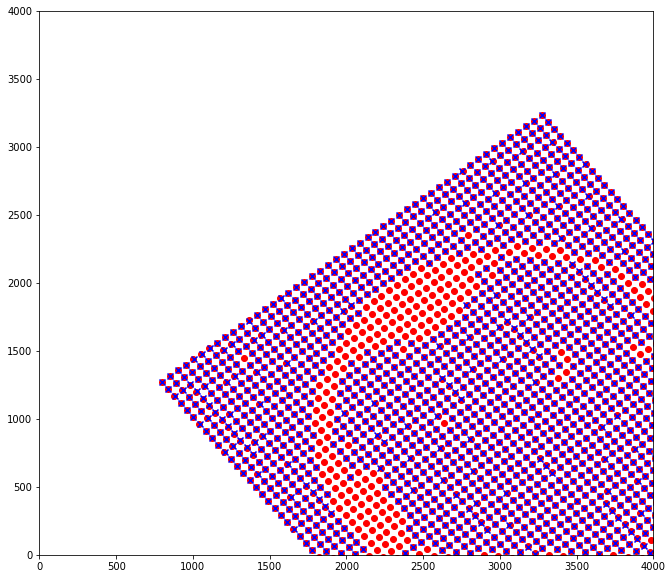

In [2]:
i = 0
infile = glob.glob("/home/abrought/DATA/12784_dither/*.cat")[i]

gridfit_task = GridFitTask()
gridfit_task.config.vary_theta = True
gridfit_task.config.outfile = 'test_gridspacing_distorted_grid.fits'

grid, result = gridfit_task.run(infile, ccd_type='E2V')
gY, gX = grid.get_source_centroids(distorted=False)

print("Fit results: ")    
print(grid.y0, grid.x0, grid.theta)
print(fit_report(result))

fig, ax = plt.subplots(1, 1, figsize=(11, 10))
ax.scatter(gX, gY, color='red', marker='o')
ax.scatter(gridfit_task.srcX, gridfit_task.srcY, color='blue', marker='x')
ax.set_xlim(0,4000)
ax.set_ylim(0,4000)
plt.savefig("test-" + str(i) + ".png")

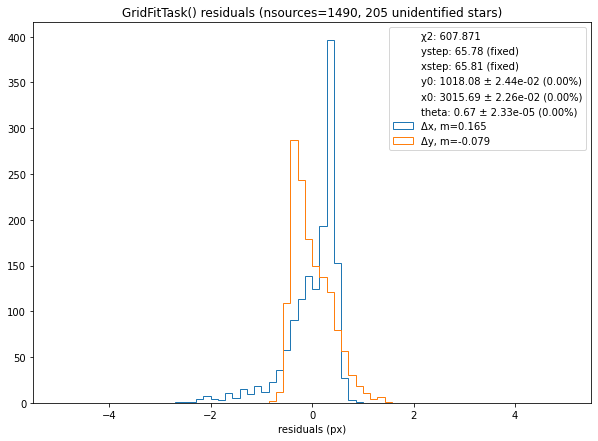

In [3]:
residualsX, residualsY, nSources, nUnidentifiedPoints = fit_check(gridfit_task.srcX,gridfit_task.srcY,gX,gY, 'E2V')
plt.figure(1, figsize=(10,7))
plt.hist(residualsX, bins=70, range=(-5,5), histtype='step', label='Δx, ' + "m=" + str(round(np.median(residualsX), 3)), log=False)
plt.hist(residualsY, bins=70, range=(-5,5), histtype='step', label='Δy, ' + "m=" + str(round(np.median(residualsY), 3)), log=False)
plt.xlabel("residuals (px)")
plt.plot([], [], ' ', label="χ2: " + str(round(result.chisqr, 3)))

for name in result.params:
    p = result.params[name]
    if p.vary:
        label = p.name + ": " + str(round(p.value,2)) + " ± " + str('{:.2e}'.format(p.stderr)) + ' ({:.2%})'.format(abs(p.stderr/p.value)) 
    else:
        label = p.name + ": " + str(round(p.value,2)) + " (fixed)"

    plt.plot([], [], ' ', label=label)

plt.legend()
plt.title("GridFitTask() residuals (nsources=" + str(nSources) + ", " + str(nUnidentifiedPoints) + " unidentified stars" + ")")
plt.savefig("test-"+ str(i) + "-fit.png")

(0.0, 4000.0)

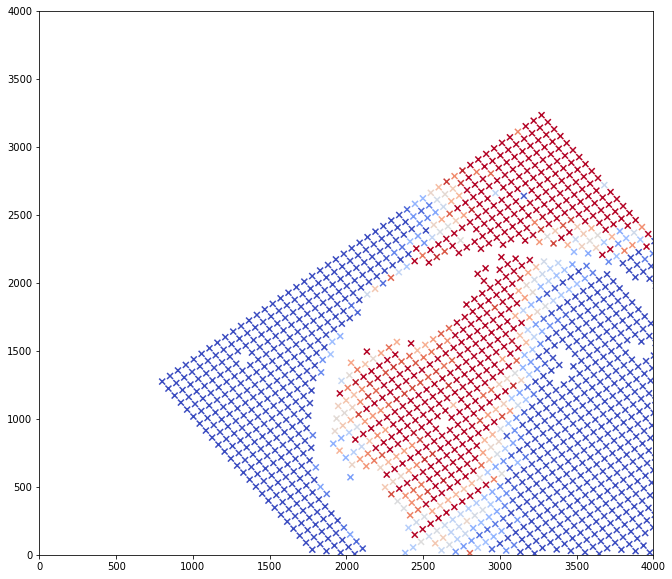

In [4]:
import matplotlib.cm as cm
residualsX = np.asarray(residualsX)
residualsY = np.asarray(residualsY)
x = np.asarray(gridfit_task.srcX)
y = np.asarray(gridfit_task.srcY)
index = np.argsort(residualsX)
x = x[index]
y = y[index]
colors = cm.coolwarm(np.linspace(-2, 2, len(residualsX)))

fig, ax = plt.subplots(1, 1, figsize=(11, 10))
ax.scatter(x, y, color=colors, marker='x')
ax.set_xlim(0,4000)
ax.set_ylim(0,4000)


(0.0, 4000.0)

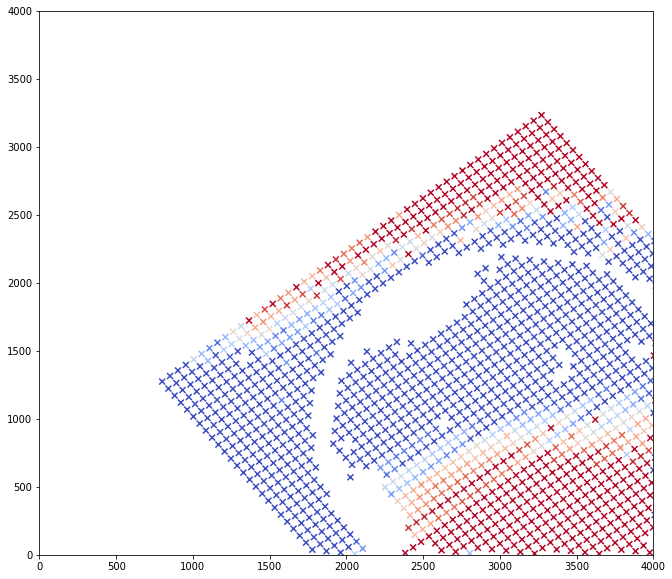

In [5]:
residualsX = np.asarray(residualsX)
residualsY = np.asarray(residualsY)
x = np.asarray(gridfit_task.srcX)
y = np.asarray(gridfit_task.srcY)
index = np.argsort(residualsY)
x = x[index]
y = y[index]
colors = cm.coolwarm(np.linspace(-2, 2, len(residualsX)))

fig, ax = plt.subplots(1, 1, figsize=(11, 10))
ax.scatter(x, y, color=colors, marker='x')
ax.set_xlim(0,4000)
ax.set_ylim(0,4000)